In [1]:
import glob
import logging
import tempfile
import PIL
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import shutil
import sys
import logging
import tempfile
import os
import torch
from PIL import Image
import torchvision
import time
import SimpleITK as sitk
from scipy import ndimage
import numpy as np
from PIL import Image, ImageOps

In [6]:
np.mean(Mean_ME_Cor_train)

-14.617191976500523

In [7]:
np.mean(Mean_MAE_Cor_train)

106.76554343611585

In [8]:
np.mean(Mean_ME_Cor_train_ori)

12.837394107619746

In [9]:
np.mean(Mean_MAE_Cor_train_ori)

134.67356397376997

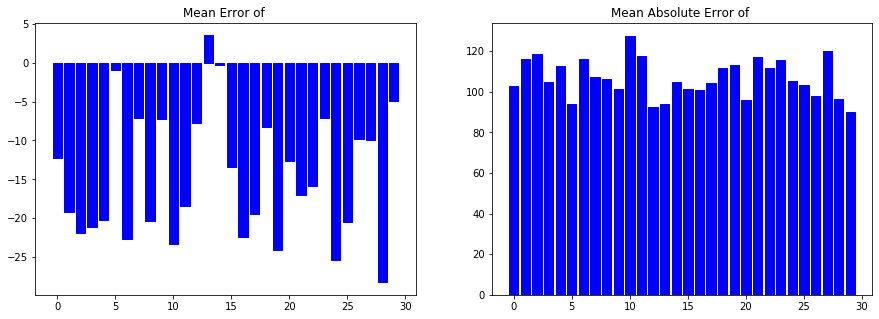

In [10]:
# Plot
n_test_patients=image_cycleGAN_mu_per_patient_sorted.shape[0]
plt.figure(counter_epoch,(15,5))
plt.subplot(1,2,1)
plt.title(f"Mean Error of ")
barlist_ME=plt.bar(np.arange(Mean_ME_Cor_train.size),Mean_ME_Cor_train)
for b in range(n_test_patients):
    barlist_ME[b].set_color('b')  #test data cor-cycleGAN
# for c in range(n_test_patients):
#     barlist_ME[c+n_test_patients].set_color('g')  #test data cor-cycleGAN

plt.subplot(1,2,2)
plt.title(f"Mean Absolute Error of ")
barlist_MAE=plt.bar(np.arange(Mean_MAE_Cor_train.size),Mean_MAE_Cor_train)
for b in range(n_test_patients):
    barlist_MAE[b].set_color('b')  #test data or-ori
# for c in range(n_test_patients):
#     barlist_MAE[c+n_test_patients].set_color('g') #test data cor-ori
plt.show()

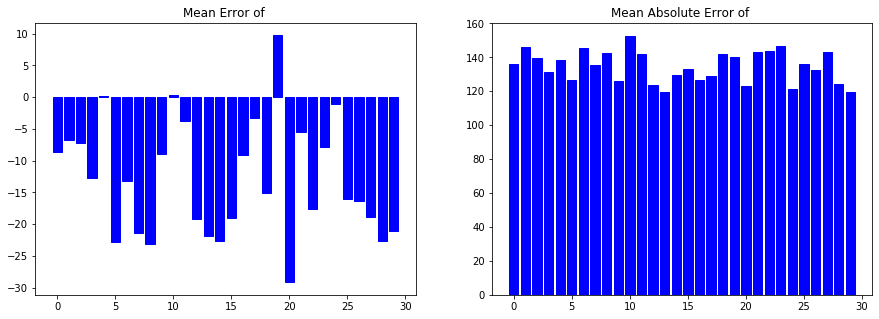

In [5]:
# Plot
n_test_patients=image_cycleGAN_mu_per_patient_sorted.shape[0]
plt.figure(counter_epoch,(15,5))
plt.subplot(1,2,1)
plt.title(f"Mean Error of ")
barlist_ME=plt.bar(np.arange(Mean_ME_Cor_train_ori.size),Mean_ME_Cor_train_ori)
for b in range(n_test_patients):
    barlist_ME[b].set_color('b')  #test data cor-cycleGAN
# for c in range(n_test_patients):
#     barlist_ME[c+n_test_patients].set_color('g')  #test data cor-cycleGAN

plt.subplot(1,2,2)
plt.title(f"Mean Absolute Error of ")
barlist_MAE=plt.bar(np.arange(Mean_MAE_Cor_train_ori.size),Mean_MAE_Cor_train_ori)
for b in range(n_test_patients):
    barlist_MAE[b].set_color('b')  #test data or-ori
# for c in range(n_test_patients):
#     barlist_MAE[c+n_test_patients].set_color('g') #test data cor-ori
plt.show()

In [12]:
np.mean(Mean_ME_Cor_validation)

-12.892095947166366

In [20]:
np.mean(Mean_MAE_Cor_validation)

102.8323719397636

In [13]:
np.mean(Mean_ME_Cor_Ori_validation )

-1046.2406889560436

In [22]:
np.mean(Mean_MAE_Cor_Ori_validation )

130.75221758797937

In [15]:
np.mean(Mean_ME_Cor_test)

-11.270619753904516

In [16]:
np.mean(Mean_MAE_Cor_test)

110.34219375201658

In [17]:
np.mean(Mean_ME_Cor_Ori_test)

9.952925420422316

In [18]:
np.mean(Mean_MAE_Cor_Ori_test)

137.29160409715269

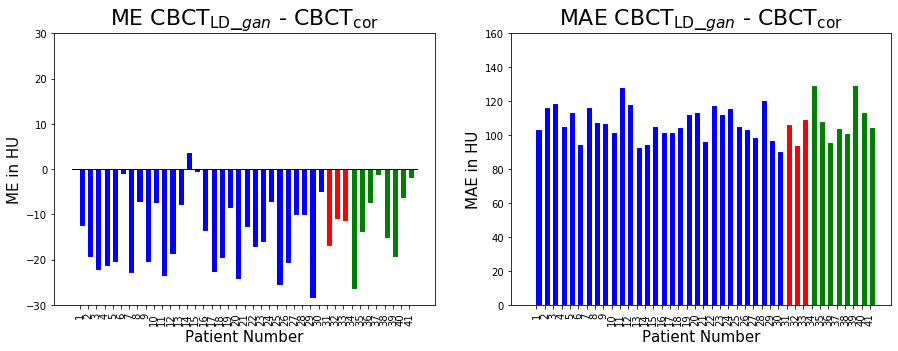

In [23]:
# Plot
ME=[]
MAE=[]
ME=[0]
MAE=[0]
ME=np.append(ME, Mean_ME_Cor_train)
ME=np.append(ME,Mean_ME_Cor_validation)
ME=np.append(ME,Mean_ME_Cor_test)
MAE=np.append(MAE,Mean_MAE_Cor_train)
MAE=np.append(MAE,Mean_MAE_Cor_validation)
MAE=np.append(MAE,Mean_MAE_Cor_test)
n_train_patients=30
n_val_patients=3
n_test_patients=8
plt.figure(counter_epoch,(15,5))

plt.subplot(1,2,1)
plt.title(f"Mean Error of ")

barlist_ME=plt.bar(np.arange(ME.size),ME, align='edge', width=0.5)
for b in range(n_train_patients):
    barlist_ME[1+b].set_color('b')  #train
for c in range(n_val_patients):
    barlist_ME[1+c+n_train_patients].set_color('r')  #validation
for d in range(n_test_patients):
    barlist_ME[1+d+n_train_patients+n_val_patients].set_color('g')  #test
    
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, 42, step=1), rotation=90)  # Set label locations.
# plt.title('ME CBCT$_{\mathrm{cor}}$ - CBCT$_{\mathrm{LD}}$_$_{gan}$', fontsize=22)
plt.title('ME CBCT$_{\mathrm{LD}}$_$_{gan}$ - CBCT$_{\mathrm{cor}}$ ', fontsize=22)
plt.xlabel('Patient Number', fontsize=15)
plt.ylabel('ME in HU', fontsize=15)
plt.ylim(-30,30)
plt.plot([0, 42], [0, 0], 'k-', lw=1)
    

plt.subplot(1,2,2)
plt.title(f"Mean Absolute Error of ")
barlist_MAE=plt.bar(np.arange(MAE.size),MAE, align='edge', width=0.5)
for b in range(n_train_patients):
    barlist_MAE[1+b].set_color('b')  #train
for c in range(n_val_patients):
    barlist_MAE[1+c+n_train_patients].set_color('r')  #validation
for d in range(n_test_patients):
    barlist_MAE[1+d+n_train_patients+n_val_patients].set_color('g')  #test

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, 42, step=1), rotation=90)  # Set label locations.
# plt.title('MAE CBCT$_{\mathrm{cor}}$ - CBCT$_{\mathrm{LD}}$_$_{gan}$', fontsize=22)
plt.title('MAE CBCT$_{\mathrm{LD}}$_$_{gan}$ - CBCT$_{\mathrm{cor}}$', fontsize=22)
plt.xlabel('Patient Number', fontsize=15)
plt.ylabel('MAE in HU', fontsize=15)
plt.ylim(0,160)

plt.show()

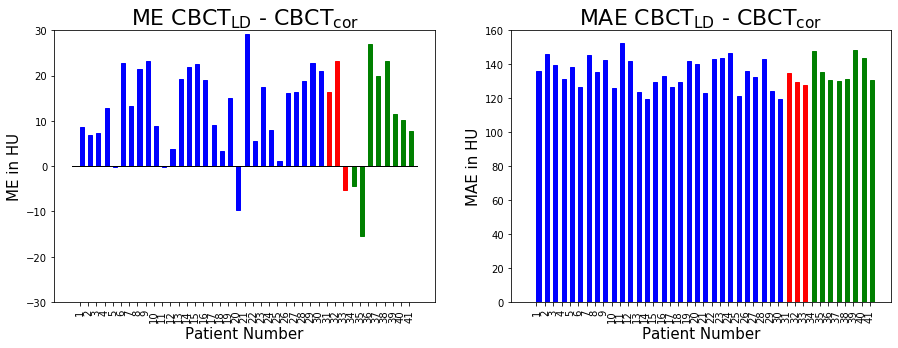

In [26]:
# Plot
ME=[]
MAE=[]
ME=[0]
MAE=[0]
ME=np.append(ME, Mean_ME_Cor_train_ori)
ME=np.append(ME,Mean_ME_Cor_Ori_validation)
ME=np.append(ME,Mean_ME_Cor_Ori_test)
MAE=np.append(MAE,Mean_MAE_Cor_train_ori)
MAE=np.append(MAE,Mean_MAE_Cor_Ori_validation)
MAE=np.append(MAE,Mean_MAE_Cor_Ori_test)
n_train_patients=30
n_val_patients=3
n_test_patients=8
plt.figure(counter_epoch,(15,5))

plt.subplot(1,2,1)
plt.title(f"Mean Error of ")

barlist_ME=plt.bar(np.arange(ME.size),ME, align='edge', width=0.5)
for b in range(n_train_patients):
    barlist_ME[1+b].set_color('b')  #train
for c in range(n_val_patients):
    barlist_ME[1+c+n_train_patients].set_color('r')  #validation
for d in range(n_test_patients):
    barlist_ME[1+d+n_train_patients+n_val_patients].set_color('g')  #test
    
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, 42, step=1), rotation=90)  # Set label locations.
# plt.title('ME CBCT$_{\mathrm{cor}}$ - CBCT$_{\mathrm{LD}}$', fontsize=22)
plt.title('ME CBCT$_{\mathrm{LD}}$ - CBCT$_{\mathrm{cor}}$', fontsize=22)
plt.xlabel('Patient Number', fontsize=15)
plt.ylabel('ME in HU', fontsize=15)
plt.ylim(-30,30)
plt.plot([0, 42], [0, 0], 'k-', lw=1)
    

plt.subplot(1,2,2)
plt.title(f"Mean Absolute Error of ")
barlist_MAE=plt.bar(np.arange(MAE.size),MAE, align='edge', width=0.5)
for b in range(n_train_patients):
    barlist_MAE[1+b].set_color('b')  #train
for c in range(n_val_patients):
    barlist_MAE[1+c+n_train_patients].set_color('r')  #validation
for d in range(n_test_patients):
    barlist_MAE[1+d+n_train_patients+n_val_patients].set_color('g')  #test

locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(1, 42, step=1), rotation=90)  # Set label locations.
# plt.title('MAE CBCT$_{\mathrm{cor}}$ - CBCT$_{\mathrm{LD}}$', fontsize=22)
plt.title('MAE CBCT$_{\mathrm{LD}}$ - CBCT$_{\mathrm{cor}}$ ', fontsize=22)
plt.xlabel('Patient Number', fontsize=15)
plt.ylabel('MAE in HU', fontsize=15)
plt.ylim(0,160)

plt.show()